In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r"/kaggle/input/gurgaon-properties/gurgaon_properties_missing_value_imputation.csv")

In [4]:
df.shape

(3545, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5178.0,2.0,3.0,2,7.0,Relatively New,1502.00,1,0,0,0,0,1,49
1,house,independent,sector 69,0.80,10485.0,1.0,1.0,0,1.0,New Property,763.05,0,0,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13351.0,2.0,3.0,3,4.0,Relatively New,978.23,1,0,0,0,0,0,135
3,flat,pioneer park,sector 61,1.60,11594.0,2.0,2.0,2,21.0,Relatively New,1533.00,0,1,0,0,0,0,105
4,flat,pivotal devaan,sector 84,0.41,7033.0,2.0,2.0,2,10.0,New Property,565.00,0,0,0,0,0,1,23


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 90,0.70,2.0,3.0,2,7.0,Relatively New,1502.00,1,0,0,0,0,1,49
1,house,sector 69,0.80,1.0,1.0,0,1.0,New Property,763.05,0,0,0,0,0,0,0
2,flat,sector 108,0.98,2.0,3.0,3,4.0,Relatively New,978.23,1,0,0,0,0,0,135
3,flat,sector 61,1.60,2.0,2.0,2,21.0,Relatively New,1533.00,0,1,0,0,0,0,105
4,flat,sector 84,0.41,2.0,2.0,2,10.0,New Property,565.00,0,0,0,0,0,1,23


### luxury score

<Axes: >

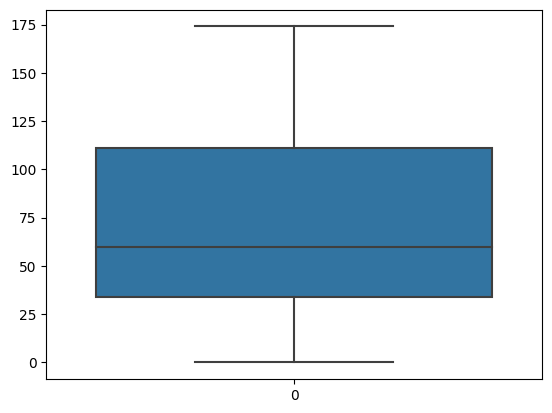

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 90,0.70,2.0,3.0,2,7.0,Relatively New,1502.00,1,0,0,0,0,1,49,Low
1,house,sector 69,0.80,1.0,1.0,0,1.0,New Property,763.05,0,0,0,0,0,0,0,Low
2,flat,sector 108,0.98,2.0,3.0,3,4.0,Relatively New,978.23,1,0,0,0,0,0,135,Medium
3,flat,sector 61,1.60,2.0,2.0,2,21.0,Relatively New,1533.00,0,1,0,0,0,0,105,Medium
4,flat,sector 84,0.41,2.0,2.0,2,10.0,New Property,565.00,0,0,0,0,0,1,23,Low


### floorNum

<Axes: >

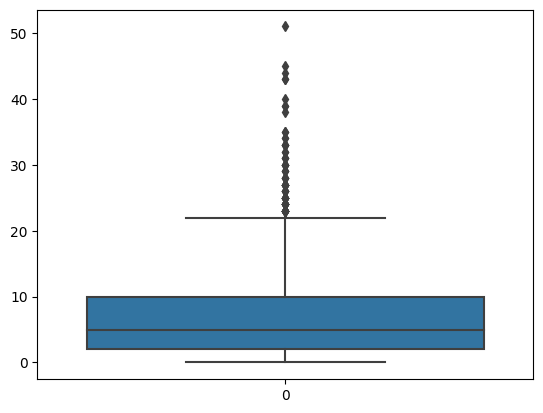

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 90,0.70,2.0,3.0,2,7.0,Relatively New,1502.00,1,0,0,0,0,1,49,Low,Mid Floor
1,house,sector 69,0.80,1.0,1.0,0,1.0,New Property,763.05,0,0,0,0,0,0,0,Low,Low Floor
2,flat,sector 108,0.98,2.0,3.0,3,4.0,Relatively New,978.23,1,0,0,0,0,0,135,Medium,Mid Floor
3,flat,sector 61,1.60,2.0,2.0,2,21.0,Relatively New,1533.00,0,1,0,0,0,0,105,Medium,High Floor
4,flat,sector 84,0.41,2.0,2.0,2,10.0,New Property,565.00,0,0,0,0,0,1,23,Low,Mid Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 90,0.70,2.0,3.0,2,Relatively New,1502.00,1,0,0,0,0,1,Low,Mid Floor
1,house,sector 69,0.80,1.0,1.0,0,New Property,763.05,0,0,0,0,0,0,Low,Low Floor
2,flat,sector 108,0.98,2.0,3.0,3,Relatively New,978.23,1,0,0,0,0,0,Medium,Mid Floor
3,flat,sector 61,1.60,2.0,2.0,2,Relatively New,1533.00,0,1,0,0,0,0,Medium,High Floor
4,flat,sector 84,0.41,2.0,2.0,2,New Property,565.00,0,0,0,0,0,1,Low,Mid Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,105.0,2.0,3.0,2.0,3.0,1502.00,1,0,0,0,0,1,1.0,2.0
1,1.0,80.0,1.0,1.0,0.0,1.0,763.05,0,0,0,0,0,0,1.0,1.0
2,0.0,12.0,2.0,3.0,3.0,3.0,978.23,1,0,0,0,0,0,2.0,2.0
3,0.0,71.0,2.0,2.0,2.0,3.0,1533.00,0,1,0,0,0,0,2.0,0.0
4,0.0,98.0,2.0,2.0,2.0,1.0,565.00,0,0,0,0,0,1,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,0.0,8.0,4.0,4.0,4.0,3.0,2851.00,0,1,0,0,0,0,0.0,0.0
3541,0.0,59.0,3.0,3.0,4.0,0.0,2600.00,0,1,0,0,0,1,0.0,2.0
3542,0.0,11.0,2.0,2.0,2.0,3.0,608.00,0,0,0,0,0,0,1.0,2.0
3543,0.0,99.0,4.0,4.0,3.0,3.0,2600.00,0,0,0,0,0,0,1.0,1.0


In [20]:
y_label

0       0.70
1       0.80
2       0.98
3       1.60
4       0.41
        ... 
3540    2.62
3541    2.97
3542    0.35
3543    2.13
3544    1.55
Name: price, Length: 3545, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

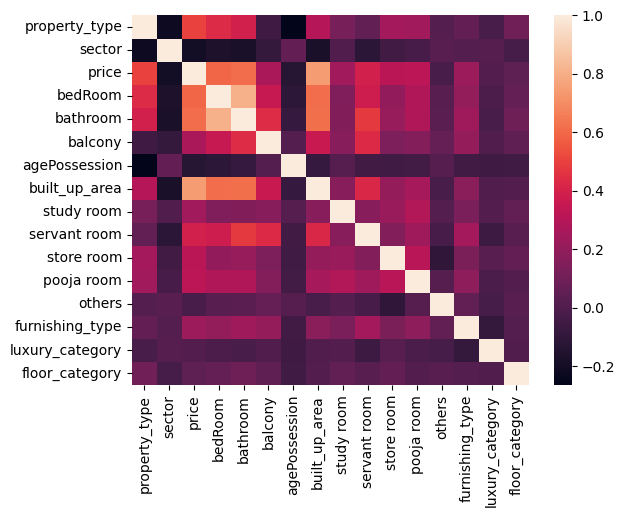

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.203136
1,price,1.000000
2,bedRoom,0.592082
3,bathroom,0.611885
4,balcony,0.270671
5,agePossession,-0.132879
6,built_up_area,0.746462
7,study room,0.240831
8,servant room,0.392902
9,store room,0.315095


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.645972
1,sector,0.107003
0,property_type,0.101895
2,bedRoom,0.023836
3,bathroom,0.023074
8,servant room,0.021931
5,agePossession,0.014688
4,balcony,0.013659
9,store room,0.013287
12,furnishing_type,0.010267


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.667668
1,sector,0.111833
0,property_type,0.095039
2,bedRoom,0.038029
3,bathroom,0.034888
8,servant room,0.023943
9,store room,0.015232
5,agePossession,0.005020
13,luxury_category,0.002244
4,balcony,0.002188


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.744331
0,property_type,0.212489
1,sector,0.175265
8,servant room,0.030067
2,bedRoom,0.027717
3,bathroom,0.011759
4,balcony,0.006263
5,agePossession,0.005663
14,floor_category,0.000948
11,others,0.000622


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.470527
0,property_type,0.706004
3,bathroom,0.281601
9,store room,0.209895
7,study room,0.170900
12,furnishing_type,0.169598
8,servant room,0.168065
10,pooja room,0.069444
13,luxury_category,0.061235
2,bedRoom,0.003432


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.653485
1,sector,0.102095
0,property_type,0.095827
2,bedRoom,0.028410
3,bathroom,0.022448
8,servant room,0.020432
5,agePossession,0.014885
4,balcony,0.013468
12,furnishing_type,0.010446
9,store room,0.009693


### Technique 7 - Linear Regression Weights

In [28]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.472721
0,property_type,0.706459
3,bathroom,0.288186
9,store room,0.214385
12,furnishing_type,0.179151
7,study room,0.178801
8,servant room,0.177459
13,luxury_category,0.072828
10,pooja room,0.072304
2,bedRoom,0.006289


### Technique 8 - SHAP

In [29]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-2.35604782e-01, -5.86574619e-01, -1.14654024e-01, ...,
         1.55290944e-04, -6.12206047e-03, -1.06759443e-02],
       [ 4.08654676e-01,  5.44446751e-02,  2.82113269e-03, ...,
        -1.21093012e-02, -5.59557715e-03, -1.59574184e-02],
       [-1.91769199e-01, -1.82163230e-01, -6.04177809e-02, ...,
        -1.38872692e-02,  1.00203364e-02, -2.17090229e-02],
       ...,
       [-1.83875211e-01, -1.72435768e-01, -5.61991047e-02, ...,
        -8.99765399e-03, -8.19649174e-03, -1.13289801e-02],
       [-3.46508254e-01, -5.90207426e-01,  3.79829905e-02, ...,
        -2.44190478e-02,  1.96010816e-02, -2.79291348e-02],
       [-2.07383998e-01, -3.83782698e-02, -1.36474167e-02, ...,
        -1.46708207e-02,  3.20827892e-03, -1.46025280e-02]])

In [30]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.236642
0,property_type,0.470899
1,sector,0.385412
3,bathroom,0.101033
8,servant room,0.096831
2,bedRoom,0.051374
4,balcony,0.044973
9,store room,0.027944
12,furnishing_type,0.026250
5,agePossession,0.026095


In [31]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [32]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.203136,0.107003,0.111833,0.175265,-0.054210,0.102095,-0.063293,0.385412
bedRoom,0.592082,0.023836,0.038029,0.027717,0.003432,0.028410,0.006289,0.051374
bathroom,0.611885,0.023074,0.034888,0.011759,0.281601,0.022448,0.288186,0.101033
balcony,0.270671,0.013659,0.002188,0.006263,-0.036486,0.013468,-0.059266,0.044973
agePossession,-0.132879,0.014688,0.005020,0.005663,-0.000000,0.014885,0.002881,0.026095
built_up_area,0.746462,0.645972,0.667668,0.744331,1.470527,0.653485,1.472721,1.236642
study room,0.240831,0.005295,0.001083,-0.001534,0.170900,0.005668,0.178801,0.015663
servant room,0.392902,0.021931,0.023943,0.030067,0.168065,0.020432,0.177459,0.096831
store room,0.315095,0.013287,0.015232,-0.005234,0.209895,0.009693,0.214385,0.027944


In [33]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [34]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.705658
sector             0.143744
bedRoom            0.030555
servant room       0.030123
bathroom           0.029956
balcony            0.012117
agePossession      0.011338
store room         0.010116
furnishing_type    0.007123
luxury_category    0.005526
floor_category     0.005516
study room         0.003878
pooja room         0.002445
others             0.001905
dtype: float64

In [35]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,105.0,2.0,3.0,2.0,3.0,1502.00,1,0,0,0,0,1,1.0,2.0
1,1.0,80.0,1.0,1.0,0.0,1.0,763.05,0,0,0,0,0,0,1.0,1.0
2,0.0,12.0,2.0,3.0,3.0,3.0,978.23,1,0,0,0,0,0,2.0,2.0
3,0.0,71.0,2.0,2.0,2.0,3.0,1533.00,0,1,0,0,0,0,2.0,0.0
4,0.0,98.0,2.0,2.0,2.0,1.0,565.00,0,0,0,0,0,1,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,0.0,8.0,4.0,4.0,4.0,3.0,2851.00,0,1,0,0,0,0,0.0,0.0
3541,0.0,59.0,3.0,3.0,4.0,0.0,2600.00,0,1,0,0,0,1,0.0,2.0
3542,0.0,11.0,2.0,2.0,2.0,3.0,608.00,0,0,0,0,0,0,1.0,2.0
3543,0.0,99.0,4.0,4.0,3.0,3.0,2600.00,0,0,0,0,0,0,1.0,1.0


In [36]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [37]:
scores.mean()

0.8065399671805051

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

0.8089314157603346

In [40]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [41]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [42]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,105.0,2.0,3.0,2.0,3.0,1502.00,0,0,1,1.0,2.0,0.70
1,1.0,80.0,1.0,1.0,0.0,1.0,763.05,0,0,0,1.0,1.0,0.80
2,0.0,12.0,2.0,3.0,3.0,3.0,978.23,0,0,0,2.0,2.0,0.98
3,0.0,71.0,2.0,2.0,2.0,3.0,1533.00,1,0,0,2.0,0.0,1.60
4,0.0,98.0,2.0,2.0,2.0,1.0,565.00,0,0,1,1.0,2.0,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,0.0,8.0,4.0,4.0,4.0,3.0,2851.00,1,0,0,0.0,0.0,2.62
3541,0.0,59.0,3.0,3.0,4.0,0.0,2600.00,1,0,1,0.0,2.0,2.97
3542,0.0,11.0,2.0,2.0,2.0,3.0,608.00,0,0,0,1.0,2.0,0.35
3543,0.0,99.0,4.0,4.0,3.0,3.0,2600.00,0,0,0,1.0,1.0,2.13
